<a href="https://colab.research.google.com/github/youngbin03/Pneumonia-Classifier/blob/main/Chest-Xray-Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글 드라이브 연동
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# 데이터 전처리 및 데이터 셋 설정
# 사진의 픽셀 224*224로 바꿈
# training set과 test set으로 나눈다

from PIL import Image
import os, glob, numpy as np

caltech_dir = "/content/gdrive/My Drive/chest_xray_neww/"
categories = ["NORMAL", "PNEUMONIA"]
nb_classes = len(categories)

image_w = 224
image_h = 224

pixels = image_h * image_w * 3

X_train = []
y_train = []

for idx, cat in enumerate(categories):

    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "train/" + cat
    files = glob.glob(image_dir+"/*.jpeg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
      img = Image.open(f)
      img = img.convert("RGB")
      img = img.resize((image_w, image_h))
      data = np.asarray(img)

      X_train.append(data)
      y_train.append(label)

      if i % 200 == 0:
        print(cat, i, "/", len(files), " : ", f)


X_train = np.array(X_train)
y_train = np.array(y_train)
# 셔플
shuf = np.arange(X_train.shape[0])
np.random.shuffle(shuf)

X_train = X_train[shuf]
y_train = y_train[shuf]

X_test = []
y_test = []

for idx, cat in enumerate(categories):

    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "test/" + cat
    files = glob.glob(image_dir+"/*.jpeg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X_test.append(data)
        y_test.append(label)

        if i % 200 == 0:
            print(cat, i, "/", len(files), " : ", f)

X_test = np.array(X_test)
y_test = np.array(y_test)
# 셔플
shuf = np.arange(X_test.shape[0])
np.random.shuffle(shuf)

X_test = X_test[shuf]
y_test = y_test[shuf]

xy = (X_train, y_train, X_test, y_test)
print("change sets to list ok")
np.save("/content/gdrive/My Drive/np/shuffled_data.npy", xy)
print("총 파일 수: ", len(y_train)+len(y_test))

NORMAL  파일 길이 :  1341
NORMAL 0 / 1341  :  /content/gdrive/My Drive/shuffled_chest_xray2/train/NORMAL/IM-0513-0001.jpeg
NORMAL 200 / 1341  :  /content/gdrive/My Drive/shuffled_chest_xray2/train/NORMAL/IM-0681-0001.jpeg
NORMAL 400 / 1341  :  /content/gdrive/My Drive/shuffled_chest_xray2/train/NORMAL/NORMAL2-IM-0552-0001.jpeg
NORMAL 600 / 1341  :  /content/gdrive/My Drive/shuffled_chest_xray2/train/NORMAL/NORMAL2-IM-0906-0001.jpeg
NORMAL 800 / 1341  :  /content/gdrive/My Drive/shuffled_chest_xray2/train/NORMAL/NORMAL2-IM-1116-0001-0002.jpeg
NORMAL 1000 / 1341  :  /content/gdrive/My Drive/shuffled_chest_xray2/train/NORMAL/IM-0122-0001.jpeg
NORMAL 1200 / 1341  :  /content/gdrive/My Drive/shuffled_chest_xray2/train/NORMAL/IM-0393-0001.jpeg
PNEUMONIA  파일 길이 :  3875
PNEUMONIA 0 / 3875  :  /content/gdrive/My Drive/shuffled_chest_xray2/train/PNEUMONIA/person579_bacteria_2382.jpeg
PNEUMONIA 200 / 3875  :  /content/gdrive/My Drive/shuffled_chest_xray2/train/PNEUMONIA/person574_bacteria_2370.jpeg
P

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


총 파일 수:  5840


In [ ]:
#필요한 모듈 import
#전처리한 데이터 불러옴
#test set y값 출력
%tensorflow_version 1.x

import os, glob, numpy as np
import PIL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization, ZeroPadding2D, InputLayer
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

X_train, y_train, X_test, y_test= np.load("/content/gdrive/My Drive/np/shuffled_data.npy", allow_pickle = True)
print("is shuffled?: ")
print(y_test[:20])
print("training set shape: " + str(X_train.shape))
print("training set size: " + str(X_train.shape[0]))

is shuffled?: 
[[0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]]
training set shape: (5216, 224, 224, 3)
training set size: 5216


In [ ]:
# 이미지 확인


In [ ]:
categories = ["NORMAL", "PNEUMONIA"]
nb_classes = len(categories)

#RGB값 일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
#모델 설계
#with 라인은 GPU사용 위한 코드

with K.tf_ops.device('/device:GPU:0'):
  model = Sequential()
  model.add(InputLayer(input_shape=X_train.shape[1:]))

  model.add(ZeroPadding2D(3))
  model.add(Conv2D(32, (7,7), padding="valid", strides=(2,2)))
  model.add(BatchNormalization(axis=2))
  model.add(Activation('relu'))

  model.add(ZeroPadding2D(1))
  model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
  model.add(BatchNormalization(axis=2))
  model.add(Dropout(0.25))

  model.add(ZeroPadding2D(1))
  model.add(Conv2D(64, (3,3), padding="valid", strides=(2,2)))
  model.add(BatchNormalization(axis=2))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3,3), padding="same", strides=(2,2)))
  model.add(BatchNormalization(axis=2))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Conv2D(256, (3,3), padding="same", strides=(2,2)))
  model.add(BatchNormalization(axis=2))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nb_classes, activation='sigmoid')) # 분류할 클래스가 3개 이상이면 softmax
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # 분류할 클래스가 3개 이상이면 categorical_crossentropy
  model_dir = '/content/gdrive/My Drive/model'

  if not os.path.exists(model_dir):
    os.mkdir(model_dir)

  model_path = model_dir + '/Xray_img_classification.model'
  checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
  early_stopping = EarlyStopping(monitor='val_loss', patience=7)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 230, 230, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 32)      448       
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 32)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 56, 56, 32)       

In [ ]:
#모델을 학습시키고 학습과정을 저장하여 그래프로 나타냄
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, shuffle=True, callbacks=[checkpoint, early_stopping])

Train on 4172 samples, validate on 1044 samples
Epoch 1/100
4172/4172 [==============================] - 9s 2ms/step - loss: 0.0259 - accuracy: 0.9897 - val_loss: 0.1387 - val_accuracy: 0.9732

Epoch 00001: val_loss did not improve from 0.06874
Epoch 2/100
4172/4172 [==============================] - 9s 2ms/step - loss: 0.0268 - accuracy: 0.9893 - val_loss: 0.1464 - val_accuracy: 0.9722

Epoch 00002: val_loss did not improve from 0.06874
Epoch 3/100
4172/4172 [==============================] - 9s 2ms/step - loss: 0.0238 - accuracy: 0.9911 - val_loss: 0.1508 - val_accuracy: 0.9722

Epoch 00003: val_loss did not improve from 0.06874
Epoch 4/100
4172/4172 [==============================] - 9s 2ms/step - loss: 0.0246 - accuracy: 0.9914 - val_loss: 0.1549 - val_accuracy: 0.9674

Epoch 00004: val_loss did not improve from 0.06874
Epoch 5/100
4172/4172 [==============================] - 9s 2ms/step - loss: 0.0189 - accuracy: 0.9932 - val_loss: 0.1360 - val_accuracy: 0.9713

Epoch 00005: val_l

In [ ]:
print("accuracy값 : %.4f" % (model.evaluate(X_test, y_test)[1]))

624/624 [==============================] - 1s 1ms/step
accuracy값 : 0.8061


In [ ]:
# 학습 결과 그래프 출력
def modelplot(history, loss, val_loss):
  plt.plot(history.history[loss])
  plt.plot(history.history[val_loss])
  plt.title('Model'+ loss)
  plt.ylabel(loss)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()


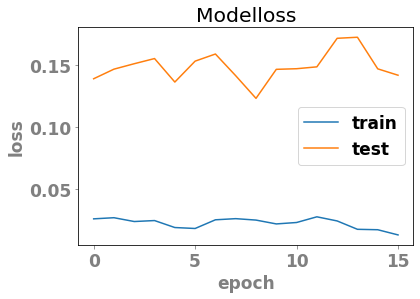

In [ ]:
modelplot(history, 'loss', 'val_loss')

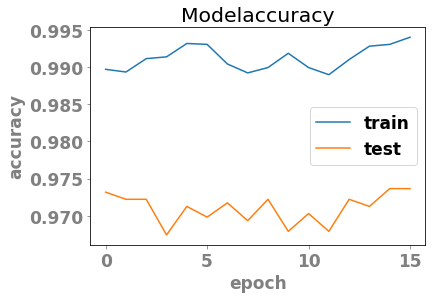

In [ ]:
modelplot(history, 'accuracy', 'val_accuracy')

Saving IM-0117-0001.jpeg to IM-0117-0001 (5).jpeg
Saving IM-0119-0001.jpeg to IM-0119-0001 (4).jpeg
Saving IM-0125-0001.jpeg to IM-0125-0001 (3).jpeg


Saving person1_bacteria_2.jpeg to person1_bacteria_2 (3).jpeg
Saving person2_bacteria_3.jpeg to person2_bacteria_3 (4).jpeg
Saving person2_bacteria_4.jpeg to person2_bacteria_4 (3).jpeg
User uploaded file "IM-0117-0001.jpeg" with length 406305 bytes
User uploaded file "IM-0119-0001.jpeg" with length 582639 bytes
User uploaded file "IM-0125-0001.jpeg" with length 451292 bytes
User uploaded file "person1_bacteria_2.jpeg" with length 81811 bytes
User uploaded file "person2_bacteria_3.jpeg" with length 132725 bytes
User uploaded file "person2_bacteria_4.jpeg" with length 139080 bytes
['IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0125-0001.jpeg', 'person1_bacteria_2.jpeg', 'person2_bacteria_3.jpeg', 'person2_bacteria_4.jpeg']
[]


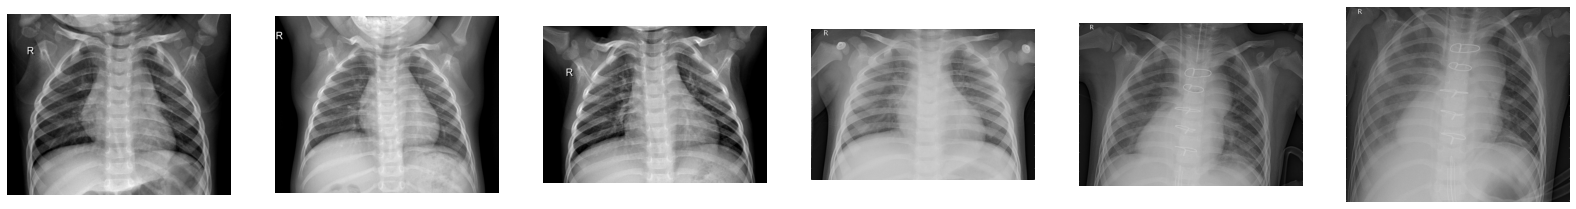

In [ ]:
#사진업로드로 테스트
import cv2
from imageio import imread

from google.colab import files

uploaded = files.upload()
uploaded.update(files.upload())

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

imgs = []
shapes = []
real_data = ["NORMAL", "NORMAL", "NORMAL", "PNEUMONIA", "PNEUMONIA", "PNEUMONIA"]
fig = plt.figure(figsize=(28,28))

for i in range(6):
  img_fname = list(uploaded.keys())[i]
  imgs.append(cv2.imread(img_fname, cv2.IMREAD_COLOR))
  b, g, r = cv2.split(imgs[i])   # openCV는 rgb 순이 아니라 bgr 순이므로 img파일을 b,g,r로 분리
  imgs[i] = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
  #shapes.append(img.shape)
  fig.add_subplot(1,6,i+1)
  plt.imshow(imgs[i])
  plt.axis('off')

print(list(uploaded.keys()))
print(shapes)

In [ ]:
#사진을 모델에 넣었을때 나오는 결과값을 리턴해주는 predict 함수 정의함

def predict(model, image, display=True):
  if display:
    plt.imshow(image[0])

  pred = model.predict(image)
  return categories[np.argmax(pred)]

[(1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3)]
["'NORMAL' is predicted as 'PNEUMONIA'", "'NORMAL' is predicted as 'PNEUMONIA'", "'NORMAL' is predicted as 'PNEUMONIA'", "'PNEUMONIA' is predicted as 'PNEUMONIA'", "'PNEUMONIA' is predicted as 'PNEUMONIA'", "'PNEUMONIA' is predicted as 'PNEUMONIA'"]


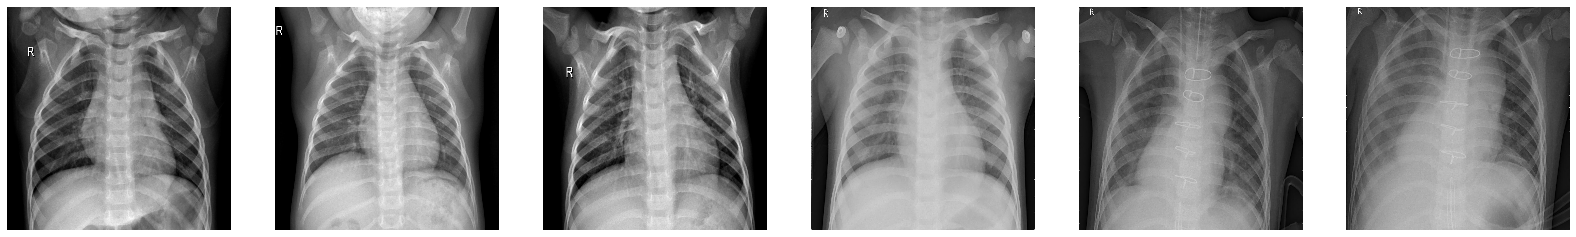

In [ ]:
fig = plt.figure(figsize=(28,28))

img224s = []
shapes = []
pred = []
result = []

for i in range(6):
  img224s.append(cv2.resize(imgs[i], (224,224)))

  fig.add_subplot(1,6,i+1)
  plt.imshow(img224s[i])
  plt.axis('off')

  img224s[i] = np.expand_dims(img224s[i], axis=0)
  shapes.append(img224s[i].shape)
  pred.append(predict(model, img224s[i]))
  result.append('\''+real_data[i]+'\' is predicted as \''+pred[i]+'\'')

print(shapes)
print(result)

dropout_3
(128,)
(14, 14, 128)
2


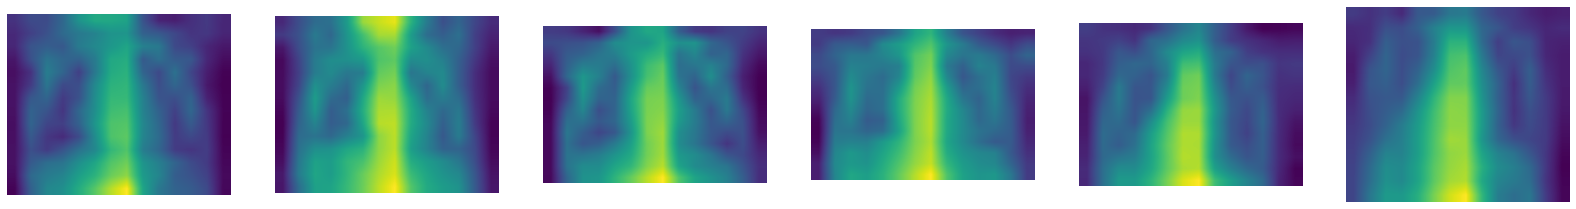

In [ ]:
# 모델이 사진의 어느부분을 보고 분류하는지 확인하기 위해 glatten층 전에 heat map을 만든다
conv_layer = model.layers[-9]
print(model.layers[-9].name)
gradients = K.gradients(model.output, conv_layer.output)[0]
mean_gradients = K.mean(gradients, axis=(0,1,2))

extractor_fn = K.function([model.input], [mean_gradients, conv_layer.output[0]])
upsized_cam_images = []
fig = plt.figure(figsize=(28,28))
for i in range(6):
  mean_grad_vals, conv_output = extractor_fn([img224s[i]])

  for j in range(14):
      conv_output[:, :, j] *= mean_grad_vals[j]

  heatmap = np.mean(conv_output, axis=-1)
  heatmap = np.maximum((heatmap), 0)
  heatmap /= np.max(heatmap)

  upsized_cam_images.append(cv2.resize(heatmap, imgs[i].shape[:2][::-1]))
  fig.add_subplot(1,6,i+1)
  plt.imshow(upsized_cam_images[i])
  plt.axis('off')

print(mean_grad_vals.shape)
print(conv_output.shape)
num_classes = model.layers[-1].output.shape[1]
print(num_classes)

["'NORMAL' is predicted as 'PNEUMONIA'", "'NORMAL' is predicted as 'PNEUMONIA'", "'NORMAL' is predicted as 'PNEUMONIA'", "'PNEUMONIA' is predicted as 'PNEUMONIA'", "'PNEUMONIA' is predicted as 'PNEUMONIA'", "'PNEUMONIA' is predicted as 'PNEUMONIA'"]


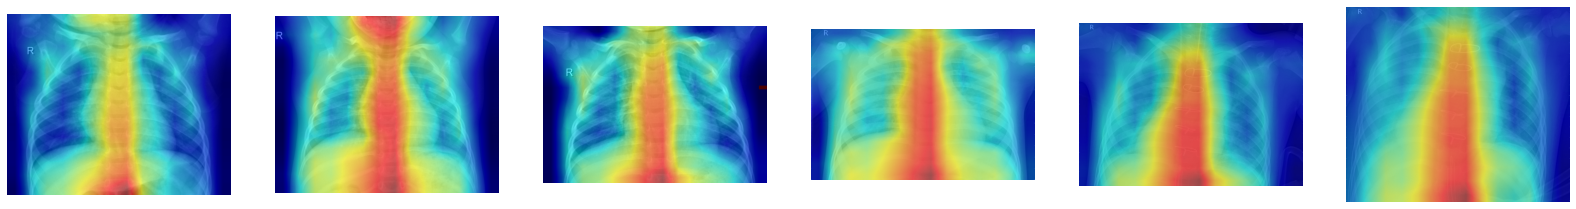

In [ ]:
#xray와 heat map 합치기
# 폐쪽에 heat map이 나타나길 바랬지만, 목 부위에서 형성됨이 보인다.
# 이는 모델의 코드가 object detection(객체 감지)가 아니라 object recognition(객체 구별)로 만들었기 때문
fig = plt.figure(figsize=(28,28))
applied_imgs = []
for i in range(6):
  applied_imgs.append(cv2.applyColorMap(np.uint8(-255*upsized_cam_images[i]), cv2.COLORMAP_JET))  # cv2.COLORMAP_HSV
  fig.add_subplot(1,6,i+1)
  plt.imshow(imgs[i])
  plt.axis('off')
  plt.imshow(applied_imgs[i], alpha=0.6)

print(result)

전이 학습에 히트맵이 없는 이유

히트맵을 만들려면 특징 추출의 마지막 층을 분류기의 출력 층으로 미분하여 gradients 값을 구해야 되는데,
전이 학습을 사용한 모델은 특징 추출기가 가중치를 동결시키고 분류기와 연결시켜서
두 layer사이에 gradients가 연관되어있지 않아서 히트맵을 만들 수 없었다.